In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\shrey\\Downloads'

In [3]:
df = pd.read_csv("Preprocessed_cleaned_Final_dataset.csv")

In [4]:
df1 = df.sample(1000)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 337 to 1209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          1000 non-null   object
 1   IsHatespeech  1000 non-null   int64 
 2   tokens        1000 non-null   object
 3   clean_text    1000 non-null   object
 4   text_length   1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 79.2+ KB


#### LogisticRegression

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

df = df1 
train, y_test = train_test_split(df['clean_text'], df['IsHatespeech'], test_size=0.2, random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test, encoder_name):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{encoder_name} Embeddings Performance:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{encoder_name} Embeddings Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    if len(set(y_test)) == 2:  
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print("AUC-ROC:", roc_auc)



ValueError: too many values to unpack (expected 2)

#### TF-IDF Embeddings


TF-IDF Embeddings Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       102
           1       0.66      0.66      0.66        98

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200

Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.67


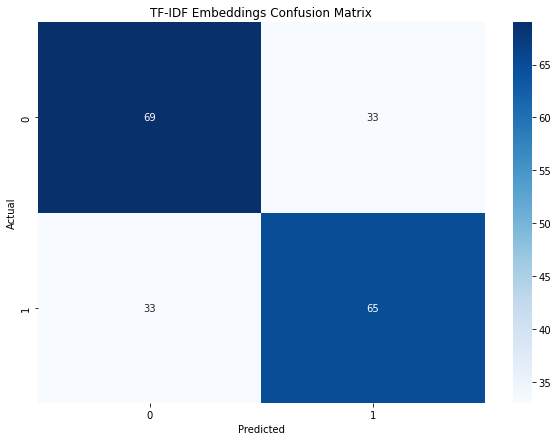

AUC-ROC: 0.7557523009203682


In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

#### Term Frequency Embeddings



Term Frequency Embeddings Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.59      0.63       102
           1       0.62      0.70      0.66        98

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.64       200

Accuracy: 0.645
Precision: 0.6484148193136957
Recall: 0.645
F1 Score: 0.6439595180239985


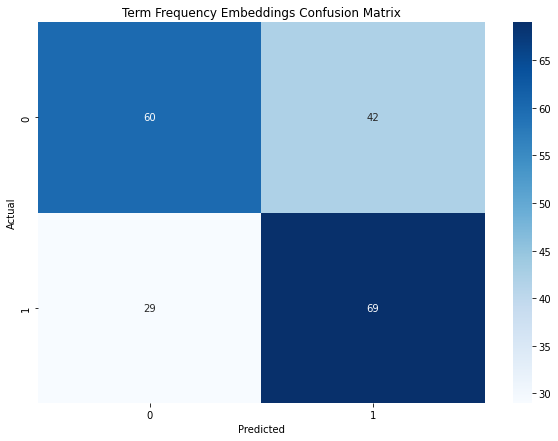

AUC-ROC: 0.7288415366146458


In [15]:

tf_vectorizer = CountVectorizer(max_features=1000)
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)
train_and_evaluate(X_train_tf, X_test_tf, y_train, y_test, "Term Frequency")

#### Word2Vec Embeddings


Word2Vec Embeddings Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.91      0.68       102
           1       0.69      0.20      0.31        98

    accuracy                           0.56       200
   macro avg       0.62      0.56      0.50       200
weighted avg       0.62      0.56      0.50       200

Accuracy: 0.565
Precision: 0.6152994555353902
Recall: 0.565
F1 Score: 0.5018032361339448


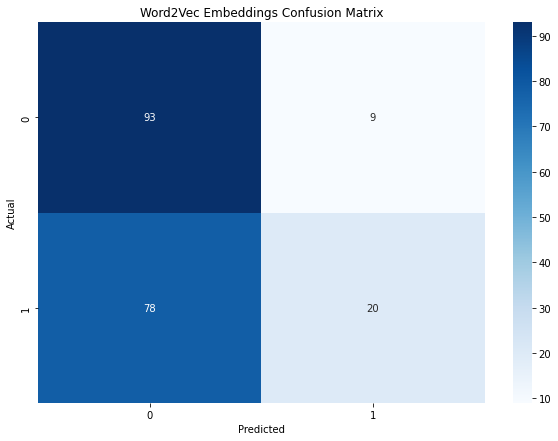

AUC-ROC: 0.6020408163265306


In [17]:

word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
def average_word_vectors(tokens, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

X_train_word2vec = np.array([average_word_vectors(tokens, word2vec_model, 100) for tokens in df.loc[X_train.index, 'tokens']])
X_test_word2vec = np.array([average_word_vectors(tokens, word2vec_model, 100) for tokens in df.loc[X_test.index, 'tokens']])
train_and_evaluate(X_train_word2vec, X_test_word2vec, y_train, y_test, "Word2Vec")


#### SVM Model To Test The Embeddings

In [19]:
from sklearn.svm import SVC
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, encoder_name):
    model = SVC(probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{encoder_name} Embeddings Performance with SVM:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{encoder_name} Embeddings Confusion Matrix with SVM")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    if len(set(y_test)) == 2:  
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        print("AUC-ROC:", roc_auc)




#### TF-IDF Embeddings


TF-IDF Embeddings Performance with SVM:
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       102
           1       0.69      0.67      0.68        98

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

Accuracy: 0.69
Precision: 0.6899519230769231
Recall: 0.69
F1 Score: 0.6899069162246022


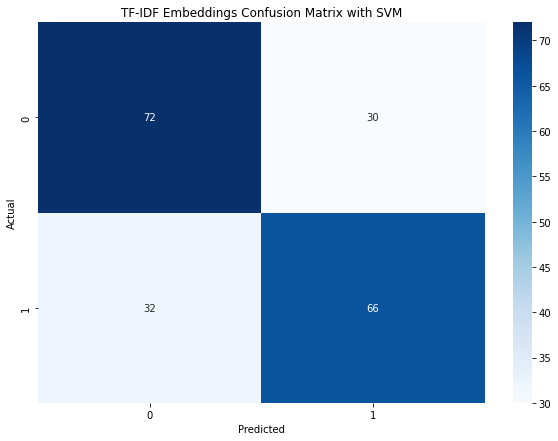

AUC-ROC: 0.7553521408563425


In [21]:
train_and_evaluate_svm(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

#### Term Frequency Embeddings


Term Frequency Embeddings Performance with SVM:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.54      0.63       102
           1       0.63      0.82      0.71        98

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200

Accuracy: 0.675
Precision: 0.6929079926653005
Recall: 0.675
F1 Score: 0.6690158730158732


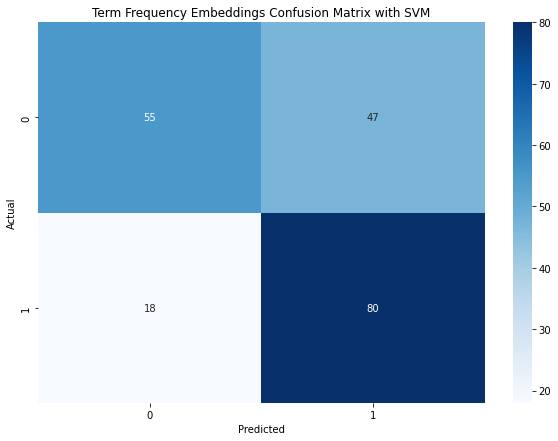

AUC-ROC: 0.7143357342937176


In [23]:

train_and_evaluate_svm(X_train_tf, X_test_tf, y_train, y_test, "Term Frequency")

### Word2Vec Embeddings


Word2Vec Embeddings Performance with SVM:
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       102
           1       1.00      0.02      0.04        98

    accuracy                           0.52       200
   macro avg       0.76      0.51      0.36       200
weighted avg       0.75      0.52      0.37       200

Accuracy: 0.52
Precision: 0.7527272727272728
Recall: 0.52
F1 Score: 0.3664


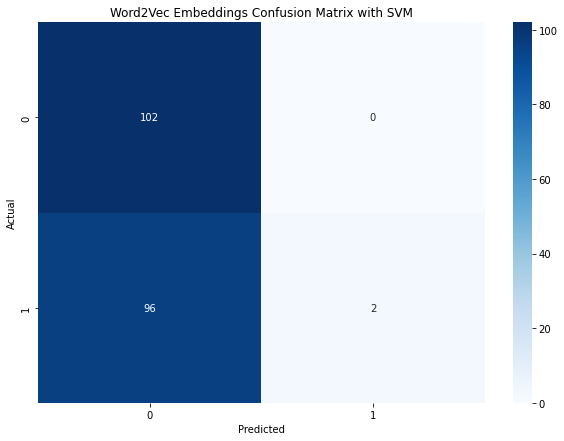

AUC-ROC: 0.4525810324129652


In [25]:

train_and_evaluate_svm(X_train_word2vec, X_test_word2vec, y_train, y_test, "Word2Vec")

# ***After Various Performance measures on ML Models IT can be Stated that TF-IDF Works best for our dataset ***